## Tech Talk tutorial
### Name : Prithvi Shetty


## Topic: Text classification using supervised learning 

## Code Index:


### 1. Getting text and cleaning it

### 2. Tokenization and preprocessing

### 3. Vectorization

### 4. Selecting the best ML model

### 5. Using the model in real-life

# Code : 

## Step 1. Getting the text and cleaning it

### 1.1 Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
import nltk
nltk.download('wordnet')
import scattertext as st
import spacy

import en_core_web_sm
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

[nltk_data] Downloading package wordnet to /Users/i870648/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1.2 Null cleaning function

In [2]:
#Null cleaning function

def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna('')
    elif series.dtype is pd.np.dtype(int):
        return series.fillna('')
    else:
        return series.fillna('NA')

### 1.3 Reading data and applying null cleaning function

In [3]:
#Reading data
data=pd.read_csv('sms_spam.tsv',sep='\t', encoding='latin-1')

In [4]:
data.shape

(5572, 2)

In [5]:
data.head(5)

,class,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [6]:
data=data.apply(myfillna)

In [7]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [8]:
data.text[:5]

0    Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                            
1    Ok lar... Joking wif u oni...                                                                                                                              
2    Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3    U dun say so early hor... U c already then say...                                                                                                          
4    Nah I don't think he goes to usf, he lives around here though                                                                                              
Name: text, dtype: object

### 1.4 Cleaning all non-alphanumeric characters

In [9]:
data.text=data.text.str.replace('[^a-zA-Z]', ' ')

### 1.5 Converting to lowercase and removing punctuations

In [10]:

RE_PREPROCESS = r'\W+|\d+' #the regular expressions that matches all non-characters
data.text = np.array( [ re.sub(RE_PREPROCESS, ' ', comment).lower() for comment in data.text])

#### Cleaned data output

In [11]:
data.text.head()

0    go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat                        
1    ok lar joking wif u oni                                                                                                       
2    free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
3    u dun say so early hor u c already then say                                                                                   
4    nah i don t think he goes to usf he lives around here though                                                                  
Name: text, dtype: object

In [55]:
data.head()

,class,text
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives around here though


In [12]:
data.head()

,class,text
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives around here though


## Step 2. Tokenization and preprocessing

In [13]:
data.head(2)

,class,text
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni


### 2.2 Lemmatization class using nltk

In [14]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

### 2.3 Splitting the training and test data and importing the Vectorization libraries



In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [16]:
data.columns

Index(['class', 'text'], dtype='object')

In [17]:
data['class'].value_counts()

ham     4825
spam    747 
Name: class, dtype: int64

Text(0.5, 1.0, 'Spam vs Ham')

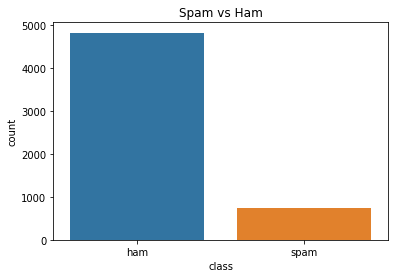

In [18]:
sns.countplot(x = "class", data = data)
plt.title('Spam vs Ham')

In [19]:
data.head(1)

,class,text
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


In [20]:
from sklearn.model_selection  import train_test_split
X = data.text
y = data['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=data['class'],random_state=2)

### 3.  Vectorization

In [21]:
vect=TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1, 2),max_df=0.7,min_df=30)
vect.fit(X_train)

/Users/i870648/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=30, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<__main__.LemmaTokenizer object at 0x7ff46bdb3f50>,
                use_idf=True, vocabulary=None)

####  Vectorizing the test and train data

In [22]:
train=vect.transform(X_train)
test=vect.transform(X_test)

## 4.  Training with the best model and tuning for accuracy.

### 4.1 Importing Machine learning classifiers from scikit learn

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn import metrics

### 4.2 Logistic regression classification

In [24]:
y_train=np.where(y_train=='spam', 1, 0)
y_test=np.where(y_test=='spam', 1, 0)

In [25]:
logreg = LogisticRegression(penalty='l2', C=0.2)
logreg.fit(train, y_train)
output_log = logreg.predict(test)

/Users/i870648/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_true = y_test
y_pred = output_log
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9726027397260274, 0.8120805369127517, 0.8702130136189035, None)

0.9497757847533632

In [27]:
y_pred_prob_log =logreg.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_log)

0.9838537107285283

### 4.3 Naive Bayes classification and results

In [28]:
nb = MultinomialNB(alpha=0.3)
nb.fit(train, y_train)
output_nb = nb.predict(test)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [29]:
y_true = y_test
y_pred = output_nb
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9704768324586323, 0.9073255797796212, 0.9357079748895606, None)

0.9721973094170404

In [30]:
y_pred_prob_nb =nb.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_nb)

0.9830616810482582

### 4.4 Random Forest classification and results

In [31]:
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(train,y_train)
output_rf = rf.predict(test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_true = y_test
y_pred = output_rf
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9724245929219492, 0.9370093237178151, 0.9537365264059893, None)

0.979372197309417

In [33]:
y_pred_prob_rf =rf.predict_proba(test)[:, 1]

In [34]:
metrics.roc_auc_score(y_true, y_pred_prob_rf)

0.9848020620562202

### F-1 score/ROC score is the chosen metric to evaluate the models because of the fact that the data is unbalanced.
### The reason : F-1 score is the harmonic mean of precision and recall and due to this fact, the results of the F-1 score make sure that the both the classes (negative and positive) are taken into consideration during the evaulation of the classifier

### And as seen, Random Forest classifier has the highest accuracy and F1-Score of 0.9582 while Naive Bayes has the highest ROC score.

In [35]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Receiver Operating Characteristic for Spam classifier')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

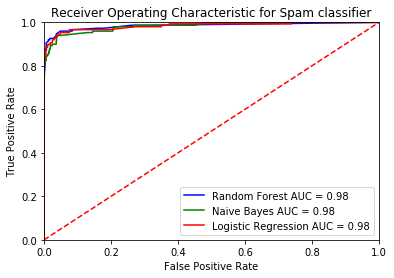

In [36]:
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob_log)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_pred_prob_nb)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, y_pred_prob_rf)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic for Spam classifier')

plt.plot(fpr3, tpr3, 'b', label = 'Random Forest AUC = %0.2f' % roc_auc3)
plt.plot(fpr2, tpr2, 'g', label = 'Naive Bayes AUC = %0.2f' % roc_auc2)
plt.plot(fpr1, tpr1, 'r', label = 'Logistic Regression AUC = %0.2f' % roc_auc1)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Tuning for accuracy and using the model in real-life

In [37]:
nb.feature_count_.shape

(2, 228)

In [38]:
tokens = vect.get_feature_names()

In [39]:
ham_token = nb.feature_count_[0, :]
spam_token = nb.feature_count_[1, :]

In [40]:
df = pd.DataFrame({'token': tokens, 'ham_token':ham_token, 'spam_token':spam_token})
df.head()

,token,ham_token,spam_token
0,account,7.670607,12.537913
1,ah,18.572736,0.000000
2,amp,27.175414,0.000000
3,ask,35.813240,0.000000
4,b,28.075544,7.526728


In [41]:
df['ham_token'] = df.ham_token / nb.class_count_[0]
df['spam_token'] = df.spam_token / nb.class_count_[1]

In [42]:
df['spam_ratio'] = df.spam_token / df.ham_token

### Top 10 features for spam

In [43]:
df.sort_values('spam_ratio', ascending=False)[:20]

,token,ham_token,spam_token,spam_ratio
20,claim,0.000000,0.048678,inf
148,prize,0.000000,0.042045,inf
62,guaranteed,0.000000,0.024594,inf
177,t c,0.000000,0.031879,inf
146,pobox,0.000000,0.022985,inf
191,tone,0.000000,0.041187,inf
135,p min,0.000000,0.020368,inf
147,ppm,0.000000,0.027245,inf
198,uk,0.000096,0.038804,404.637602
220,www,0.000121,0.045203,372.869369


### Top 10 features for ham

In [44]:
df.sort_values('spam_ratio', ascending=True)[:10]

,token,ham_token,spam_token,spam_ratio
227,yup,0.005277,0.0,0.0
189,told,0.006101,0.0,0.0
36,didn,0.004409,0.0,0.0
38,doing,0.008942,0.0,0.0
43,dun,0.005352,0.0,0.0
127,nice,0.006145,0.0,0.0
121,morning,0.007439,0.0,0.0
46,feel,0.006525,0.0,0.0
47,fine,0.005717,0.0,0.0
48,finish,0.005072,0.0,0.0


In [45]:
testdata=data.copy()

In [46]:
testdata.head()

,class,text
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives around here though


### Rendering a visualization in D3 for the same

In [47]:

nlp = en_core_web_sm.load()
corpus = st.CorpusFromPandas(testdata,category_col='class',text_col='text',nlp=st.whitespace_nlp_with_sentences).build().remove_terms(ENGLISH_STOP_WORDS, ignore_absences=True)

In [48]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['ham'] = corpus.get_scaled_f_scores('ham')
term_freq_df['spam'] = corpus.get_scaled_f_scores('spam')

In [49]:
html = st.produce_scattertext_explorer(corpus,category='spam',category_name='spam',not_category_name='ham',width_in_pixels=1000,metadata=testdata['class'])
open("spam_ham.html", 'wb').write(html.encode('utf-8'))

1137970

In [50]:
term_freq_df.sort_values('spam',ascending=False)[:20]

,ham freq,spam freq,ham,spam
term,,,,
awarded,0,38,0.000000e+00,1.0
cs,0,44,0.000000e+00,1.0
tones,0,30,0.000000e+00,1.0
ppm,0,49,0.000000e+00,1.0
or call,0,30,0.000000e+00,1.0
won a,0,40,0.000000e+00,1.0
have won,0,54,0.000000e+00,1.0
pobox,0,42,0.000000e+00,1.0
tone,0,60,0.000000e+00,1.0


### Example predictions 

In [58]:
sentence="Have a nice day! Best, Prithvi"

In [59]:
rf.predict(vect.transform([sentence]))

array([0])

## Next steps on what could improve the performance of the classifier:


1) Balancing the data by obtaining more relevant data for the underrepresented class/ oversampling the underrepresented class is a good way to obtain more robust results.

2) Implementing deep neural networks to classify the data:

    a)LSTMs (preserves imformation from the past data)
    b)Bi-directional LSTMS (since it runs the inputs in both ways, it is able to preserve information from the past as well as the future)
    c) Attention models will ensure that they pay only certain amount of attention to the phrases/words which are important for classification.
   

3) Using Word embeddings such as GloVe embeddings and Bert embeddings in the embedding layer will definitely increase the accuracy and make the model more robust for classification.
     This approach will ensure that all the similar terms are used as one for classification (eg: In the Word2Vec feature space, the words "prize" and "award" will have very high similarity scores which will be really useful for their classification)


4) Trying out approaches such as Doc2Vec to see if representation of documents (sentences) as vectors will improve the performance of the classifier or not.

5) Tuning the hyperparameters of the existing models such as NO_OF_TREES for Random Forest, tuning the penalty parameter for logistic regression (L1 lasso or L2 Ridge).
















In [53]:
rf.predict(vect.transform(["I have sent you an invite. See you later tomorrow"]))
rf.predict(vect.transform(["100000 dollars prize guaranteed"]))
rf.predict(vect.transform(["Claim your free money @ www.getphished.com"]))

array([0])

array([1])

array([1])